In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
df_contracts=pd.read_csv("./churn_contracts.csv")
df_customers=pd.read_csv("./churn_customers.csv")
df_services=pd.read_csv("./churn_services.csv")

In [3]:
df_contracts.head(3)

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
df_contracts.tail(3)

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,66,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


TotalCharges deveria ser float, no entanto tem alguma sujeira no dado que transforma para obj

In [6]:
# df_contracts.TotalCharges= df_contracts.TotalCharges.astype("float")

In [7]:
df_contracts.TotalCharges=pd.to_numeric(df_contracts.TotalCharges,errors="coerce")
#df_contracts.TotalCharges=df_contracts.TotalCharges.fillna(0)
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


#### Renomear uma coluna

In [8]:
df_customers.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No


In [9]:
df_customers=df_customers.rename(columns={"SeniorCitizen":"Above65yo"})
df_customers.head(3)

,customerID,gender,Above65yo,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No


In [10]:
df_customers.columns=["IDCliente","Genero","Mais65anos","TemParceiro","TemDependentes"]
df_customers.head(3)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No


### Unificar dataframes


In [11]:
print("Numero de linhas dos dataframes de Customers: {}, Services: {} e Contracts: {}".format(len(df_customers),len(df_services),len(df_contracts)))

Numero de linhas dos dataframes de Customers: 7043, Services: 7043 e Contracts: 7043


Como temos dataframes com colunas em comum mas nomes diferentes, para unificar esses datafrmes temos que deixar os nomes em comum

In [12]:
df_services.rename(columns={"customerID":"IDCliente"},inplace=True)
print(df_customers.info())
print(df_services.info())
print(df_contracts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IDCliente       7043 non-null   object
 1   Genero          7043 non-null   object
 2   Mais65anos      7043 non-null   int64 
 3   TemParceiro     7043 non-null   object
 4   TemDependentes  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IDCliente         7043 non-null   object
 1   PhoneService      7043 non-null   object
 2   MultipleLines     7043 non-null   object
 3   InternetService   7043 non-null   object
 4   OnlineSecurity    7043 non-null   object
 5   OnlineBackup      7043 non-null   object
 6   DeviceProtection  7043 non-null   object
 7   Tec

In [13]:
### Unificar com colunas com o mesmo nome

df_temp=df_customers.merge(df_services,how="inner",on="IDCliente")
df_temp.head(3)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No


In [14]:
### Unificar com colunas com nomes diferentes

df_churn=df_temp.merge(df_contracts, left_on="IDCliente",right_on="customerID")
df_churn.head(3)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [15]:
### Unificar todos os datafrmes de uma vez e sem alterar o nome das colunas para agrupar

df_churn=df_customers.merge(df_services, on=['IDCliente']).merge(df_contracts, left_on="IDCliente",right_on="customerID")
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65anos        7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  customerID        7043 non-null   object 
 15  tenure            7043 non-null   int64  
 16  Contract          7043 non-null   object 


#### No entanto "customerID" e "IDCliente" ficaram repetidos, dessa forma devemos excluir uma dessas colunas

In [16]:
df_churn.drop(["customerID"],axis=1,inplace=True)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65anos        7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  tenure            7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Detectar valores ausentes

In [17]:
# Ddetectar valores ausentes em todas as colunas de um dataframe

df_churn.isna().sum()

,0
IDCliente,0
Genero,0
Mais65anos,0
TemParceiro,0
TemDependentes,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [18]:
df_churn.TotalCharges.isna().sum()

np.int64(11)

In [19]:
# Quantas linhas tem pelo menos 1 coluna com valor ausente

df_churn[df_churn.isna().any(axis=1)]

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,0,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,0,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,0,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,0,Two year,No,Mailed check,73.35,NaN,No


In [20]:
### Quantas colunas são referentes a espaços ausentes Not a number

df_churn.isna().any(axis=0).sum()

np.int64(1)

#### Removendo colunas com valores ausentes

In [21]:
df_churn.drop(columns=["TotalCharges"], axis=1, inplace=False).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65anos        7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  tenure            7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
#### removendo todos com NaN

df_churn.dropna(axis=1,inplace=False).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65anos        7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  tenure            7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
# Axis 0 remove as linhas e 1 as colunas, nesse caso está removendo as linhas problemáticas
df_churn.dropna(axis=0,inplace=False).info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7032 non-null   object 
 1   Genero            7032 non-null   object 
 2   Mais65anos        7032 non-null   int64  
 3   TemParceiro       7032 non-null   object 
 4   TemDependentes    7032 non-null   object 
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  tenure            7032 non-null   int64  
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [24]:
#### Remover uma coluna onde todos os vales são ausentes

df_churn.dropna(axis=1,how="all",inplace=False).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65anos        7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  tenure            7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Preencher todos os valores ausentes por algum valor como zero

In [25]:
df_churn.fillna(0,inplace=False).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65anos        7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  tenure            7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Preencher todos os valores ausentes por algum valores categóricos/qualitativos


In [26]:
df_churn.fillna(value={"Totalcharges":0,"Genero":"Não Declarado"})

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### Pode ser interessante em alguns casos colocar a média, mediana ou moda no lugar do valor ausente !!!

### Análise univariada

Hipóteses para testar
* A faixa hetéria do cliente tem uma forte associação com o churn
* Um cliente com menos de 6 meses de contrato ativo é mais propenso ao churn (sair)
* Cliente com contratos mensais são mais propensos ao churn

In [27]:
# Verificar valores possíveis (únicos) em uma variável

df_churn.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [28]:
# Contar quantos casos ocorre um valor possível de uma variável

df_churn.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


In [29]:
df_churn.Churn.value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


[Text(0, 0, '5174'), Text(0, 0, '1869')]

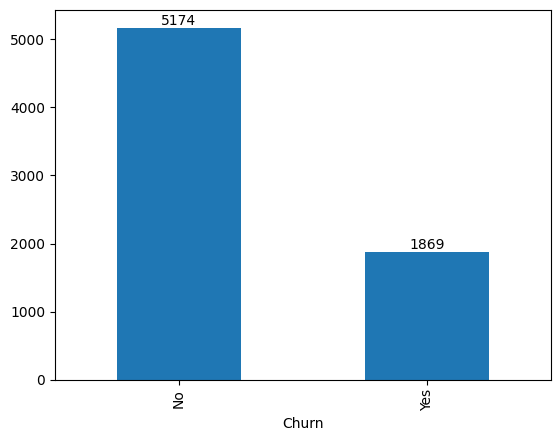

In [30]:
ax =df_churn.Churn.value_counts().plot.bar()

ax.bar_label(ax.containers[0])

[Text(0, 0, '0.73463'), Text(0, 0, '0.26537')]

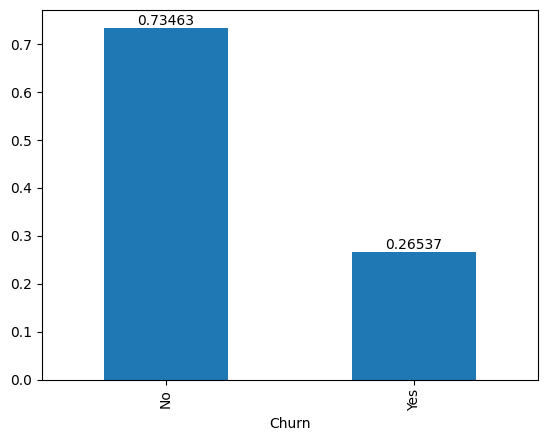

In [31]:
ax =df_churn.Churn.value_counts(normalize=True).plot.bar()

ax.bar_label(ax.containers[0])

In [32]:
# Quais são os tipos de contrato?

df_churn.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

[Text(0, 0, '3875'), Text(0, 0, '1695'), Text(0, 0, '1473')]

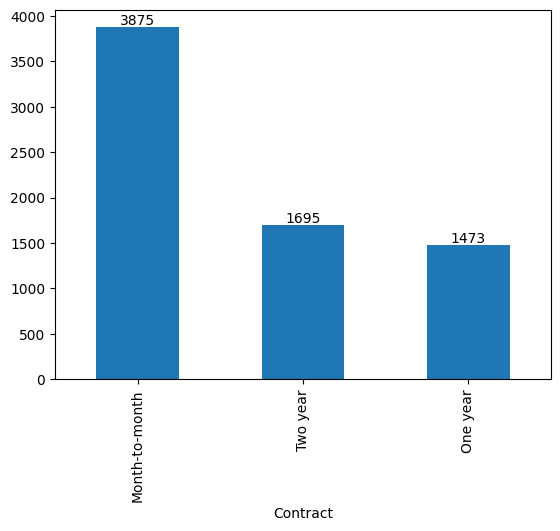

In [33]:
ax=df_churn.Contract.value_counts().plot.bar()
ax.bar_label(ax.containers[0])

[Text(0, 0, '0.0418856'),
 Text(0, 0, '0.0216921'),
 Text(0, 0, '0.0141196'),
 Text(0, 0, '0.0158155'),
 Text(0, 0, '0.0104911'),
 Text(0, 0, '0.0119898'),
 Text(0, 0, '0.0137252'),
 Text(0, 0, '0.00820357'),
 Text(0, 0, '0.0109644'),
 Text(0, 0, '0.00855854'),
 Text(0, 0, '0.00907126'),
 Text(0, 0, '0.0104122'),
 Text(0, 0, '0.00733589'),
 Text(0, 0, '0.0104911'),
 Text(0, 0, '0.00859798'),
 Text(0, 0, '0.010925'),
 Text(0, 0, '0.0110038'),
 Text(0, 0, '0.00875574'),
 Text(0, 0, '0.0143168'),
 Text(0, 0, '0.0294224')]

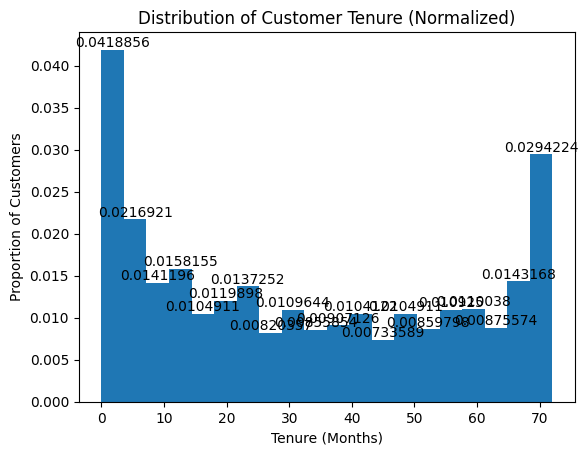

In [34]:
# Histograma de tempo de contrato

ax = df_churn.tenure.plot.hist(bins=20, density=True) # Use density=True for normalized histogram
ax.set_title("Distribution of Customer Tenure (Normalized)")
ax.set_xlabel("Tenure (Months)")
ax.set_ylabel("Proportion of Customers")
ax.bar_label(ax.containers[0]) # Label will show proportion

<Axes: xlabel='tenure', ylabel='Count'>

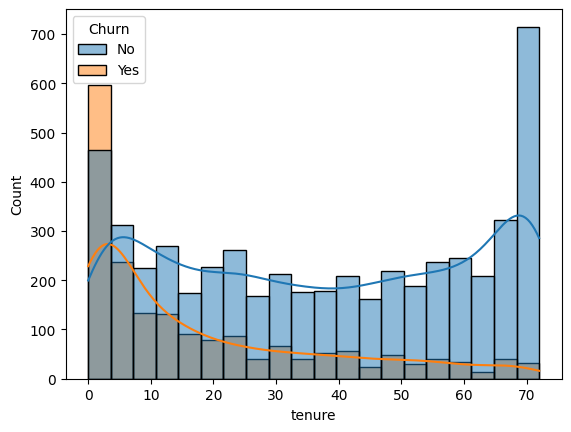

In [35]:
import seaborn as sns

sns.histplot(data=df_churn, x='tenure', hue='Churn', bins=20, kde=True)

<Axes: xlabel='tenure', ylabel='Density'>

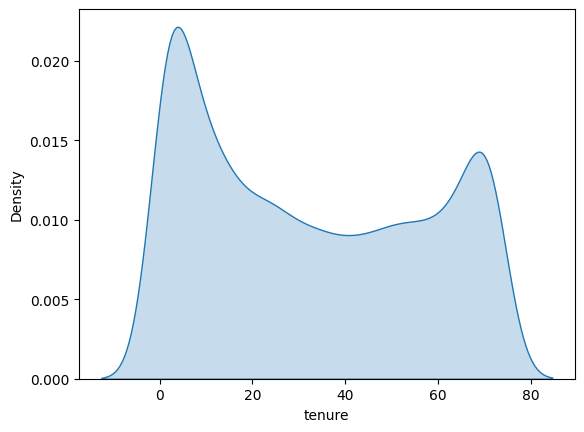

In [36]:
import seaborn as sns

sns.kdeplot(data=df_churn, x='tenure', fill=True)

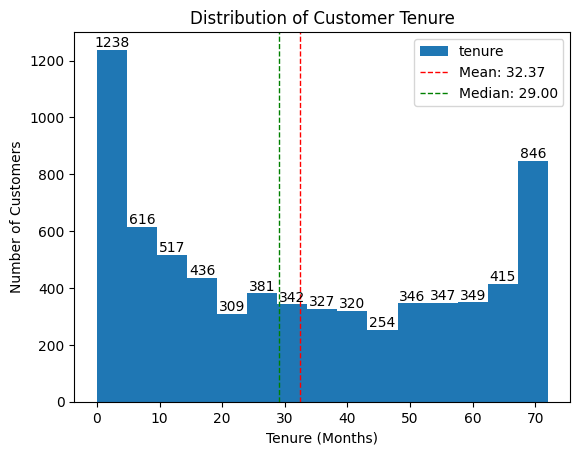

In [37]:
import matplotlib.pyplot as plt

ax = df_churn.tenure.plot.hist(bins=15)
ax.set_title("Distribution of Customer Tenure")
ax.set_xlabel("Tenure (Months)")
ax.set_ylabel("Number of Customers")
ax.bar_label(ax.containers[0])

mean_tenure = df_churn.tenure.mean()
median_tenure = df_churn.tenure.median()

ax.axvline(mean_tenure, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_tenure:.2f}')
ax.axvline(median_tenure, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_tenure:.2f}')
ax.legend()
plt.show()

O histograma não apresenta formato de sino

<Axes: ylabel='Frequency'>

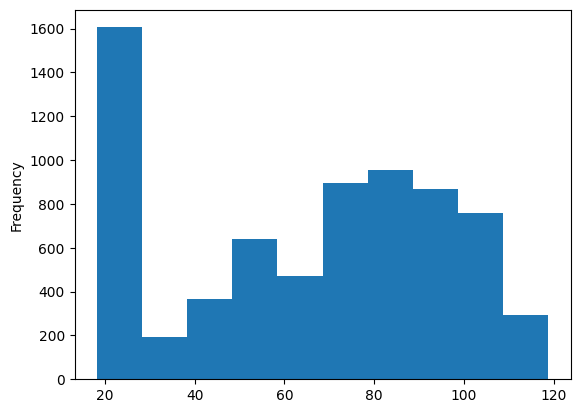

In [38]:
df_churn.MonthlyCharges.plot.hist()

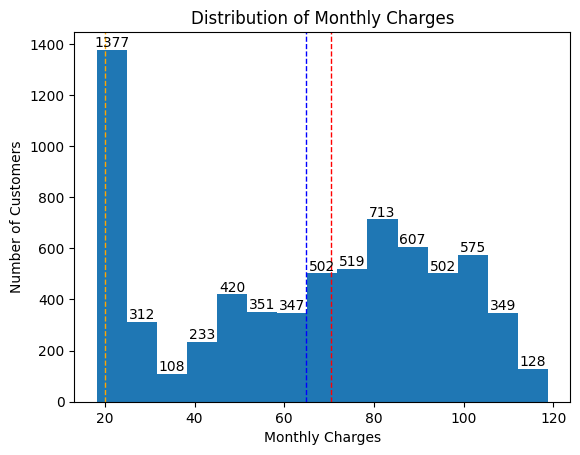

In [39]:
import matplotlib.pyplot as plt

ax=df_churn.MonthlyCharges.plot.hist(bins=15)
ax.set_title("Distribution of Monthly Charges")
ax.set_xlabel("Monthly Charges")
ax.set_ylabel("Number of Customers")
ax.bar_label(ax.containers[0])

median=df_churn.MonthlyCharges.median()
mean=df_churn.MonthlyCharges.mean()
mode=df_churn.MonthlyCharges.mode()

ax.axvline(median, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}')
ax.axvline(mean, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
ax.axvline(mode[0], color='orange', linestyle='dashed', linewidth=1, label=f'Mode: {mode[0]:.2f}')

plt.show()

In [40]:
# Medida de disperção, o quanto os valores variam em relação a média

print("Desvio padrão: ", df_churn.tenure.std())
print("Variância: ", df_churn.tenure.var())
print("Coeficiente de variação: ", df_churn.tenure.std()/df_churn.tenure.mean())

Desvio padrão:  24.55948102309423
Variância:  603.1681081237256
Coeficiente de variação:  0.7586842617906603


### Métodos importantes no dia a dia para uso de análise de variáveis

In [41]:
# Quantos clientes possuem 1 mês de contrato - Filtro
df_clientes_1mes=df_churn[df_churn.tenure==1]

# Total desses casos
print("Num. clientes com 1 mes de contrato: ",len(df_clientes_1mes))

# Porcentagem desses casos
print("Num. clientes com 1 mes de contrato: ",(len(df_clientes_1mes)/len(df_churn))*100)

Num. clientes com 1 mes de contrato:  613
Num. clientes com 1 mes de contrato:  8.70367741019452


In [42]:
# Quantos clientes possuem entre 1 e 6 meses de contrato
df_clientes_1mes_a_6mes=df_churn[(df_churn.tenure>=1) & (df_churn.tenure<=6)]

print("Num. clientes entre 1 mês e 6 meses de contrato: ",len(df_clientes_1mes_a_6mes))


Num. clientes entre 1 mês e 6 meses de contrato:  1470


In [43]:
# Quantos clientes possuem menos de 6 meses de contrato e homens
df_clientes_6menos_e_male=df_churn[(df_churn.Genero=="Male") & (df_churn.tenure<=6)]

print("Num. clientes menos de 6 meses de contrato e homens: ",len(df_clientes_6menos_e_male))

Num. clientes menos de 6 meses de contrato e homens:  746


In [44]:
# Agrupnado os clientes e mostrando em ordem ascendente
df_churn.groupby(["tenure"])["tenure"].count().sort_values(ascending=False)

,tenure
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


<Axes: ylabel='tenure'>

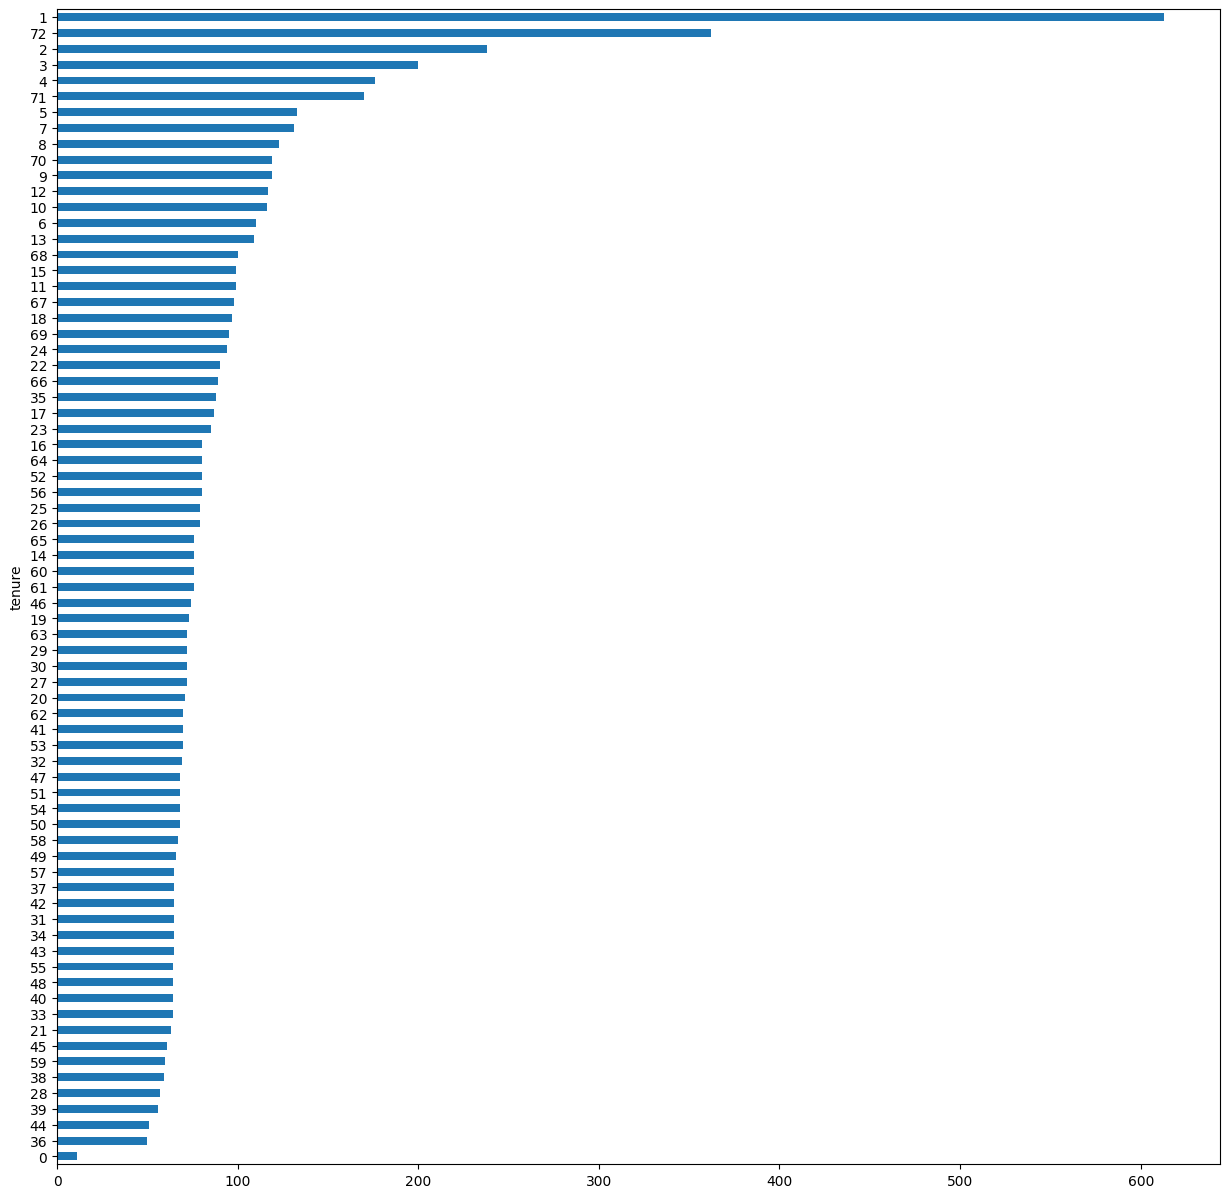

In [45]:
# Agrupnado os clientes e mostrando em ordem ascendente (plotagem)
df_churn.groupby(["tenure"])["tenure"].count().sort_values().plot.barh(figsize=(15,15))

## Análise Bivariada

In [46]:
# Hipóteses clientes com contrato mensal são mais propensos ao churn

pd.crosstab(df_churn.Churn,df_churn.Contract)

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


In [47]:
pd.crosstab(df_churn.Churn,df_churn.Contract, margins=True,margins_name="Total")

Contract,Month-to-month,One year,Two year,Total
Churn,,,,
No,2220,1307,1647,5174
Yes,1655,166,48,1869
Total,3875,1473,1695,7043


In [48]:
# Tabela cruzada com porcentagem

pd.crosstab(df_churn.Churn,df_churn.Contract, margins=True,margins_name="Total", normalize="index")

Contract,Month-to-month,One year,Two year
Churn,,,
No,0.429068,0.252609,0.318322
Yes,0.885500,0.088818,0.025682
Total,0.550192,0.209144,0.240664


Considerando a publico total, os clientes de contrato mensal representam 55%. Porem, se considerarmos apenas os clientes que abandonaram o serviço, 88% tinham contrato mensal. Desta forma, podemos afirmar que há uma correlação entre o tipo de contrato mensal e o abandono

#### Avaliar a correlação entre duas variáveis categóricas (qualitativas)
Executar um teste de hipótese chamado Chi-Square ou Qui-Quadrado de Pearson

> Num teste de hipótese, duas hipóteses são formuladas:
*  H0 (Hipótese Nula): As duas variáveis são independentes
*  H1 (Hipótese Complementar): As duas variáveis não são independentes

> O teste serve para confirmar ou recusar uma hipótese nula (H0). Quando a probabilidade de observarmos H0 é inferior a 0.05 (p-value) recusamos a hiótese com a complementar


In [49]:
# !!! gerar cross tab sem totais
df_crosstab_churn_contract=pd.crosstab(df_churn.Churn,df_churn.Contract)

In [50]:
# Calcular Scores com P-values
from scipy.stats import  chi2_contingency

chi_df_crosstab_churn_contract = chi2_contingency(df_crosstab_churn_contract)

print(chi_df_crosstab_churn_contract)

scores_churn_contract=pd.Series(chi_df_crosstab_churn_contract[0])
p_value_churn_contract=pd.Series(chi_df_crosstab_churn_contract[1])


# Apresentar numeros com decimais sem a notação científica
pd.set_option('display.float_format', lambda x: '%.15f' % x)

print("Qui^2: ",scores_churn_contract)
print("p-value: ",p_value_churn_contract)

Chi2ContingencyResult(statistic=np.float64(1184.5965720837926), pvalue=np.float64(5.863038300673391e-258), dof=2, expected_freq=array([[2846.69175067, 1082.11018032, 1245.198069  ],
       [1028.30824933,  390.88981968,  449.801931  ]]))
Qui^2:  0   1184.596572083792580
dtype: float64
p-value:  0   0.000000000000000
dtype: float64


Conforme teste estatpistica Chi-Aquare, o P-value <= 0.05, desta forma rejeitamos a hiótese nula, ou seja, as variáveis não são independentes. Pelo Qui^2 alto podemos afirmar que existe uma forte correlação.

* Avaliar a correlação entre uma variável qualitativa e quatitativa

* Usar o mesmo teste de Chi-Square, mas transformar a variável quatitativa em qualitativa

* Hipótese: Cliente com menos de 6 meses de contrato é mais propenso ao Churn

* Criar uma coluna nova no DataFrame com base numa condição de outra Coluna
Coluna = "TempoMenor6Meses"


#### Crir uma coluna em um Dataframe com uma condição de outra coluna

In [51]:
# df_churn["TempoMenor6Meses"]=df_churn.tenure.apply(lambda x: "Yes" if x<=6 else "No")

import numpy as np

df_churn["TempoMenor6Meses"]=np.where(df_churn.tenure<=6,"Yes","No")
df_churn.head(5)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,Yes
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes,Yes


In [52]:
df_crosstab_churn_tenure=pd.crosstab(df_churn.Churn,df_churn.TempoMenor6Meses)
df_crosstab_churn_tenure

TempoMenor6Meses,No,Yes
Churn,,
No,4477,697
Yes,1085,784


In [53]:
# calcular os scores

chi_scores_churn_tenure=chi2_contingency(df_crosstab_churn_tenure)

scores_churn_tenure=pd.Series(chi_scores_churn_tenure[0])
p_value_churn_tenure=pd.Series(chi_scores_churn_tenure[1])


# Apresentar numeros com decimais sem a notação científica
pd.set_option('display.float_format', lambda x: '%.15f' % x)

print("Qui^2: ",scores_churn_tenure)
print("p-value: ",p_value_churn_tenure)

Qui^2:  0   668.751776632614224
dtype: float64
p-value:  0   0.000000000000000
dtype: float64


Como o P-Value <=0.05, rejeitamos a H0, ou seja, as variáveis não são independentes. E vale mencionar que com base do Qui^2 resultante das 2 análises, a correlação entre Churn e Tempo de Contrato < 6 meses é menor do que a correlação entre Churn e Tipo de Contrato

* Correlação entre duas variáveis numéricas
* Tenure com TotalCharges
* A intuição é que quanto mais tempo de contrato maior o valor pago

In [54]:
# Correlação dentre 2 variáveisnuméricas - Pearson/Spearman

print("Correlação entre tenure e totalcharges, Pearson: ",df_churn.tenure.corr(df_churn.TotalCharges,method="pearson"))
print("Correlação entre tenure e totalcharges, Spearman: ",df_churn.tenure.corr(df_churn.TotalCharges,method="spearman"))

Correlação entre tenure e totalcharges, Pearson:  0.8258804609332024
Correlação entre tenure e totalcharges, Spearman:  0.8891770805365491


<Axes: xlabel='tenure', ylabel='TotalCharges'>

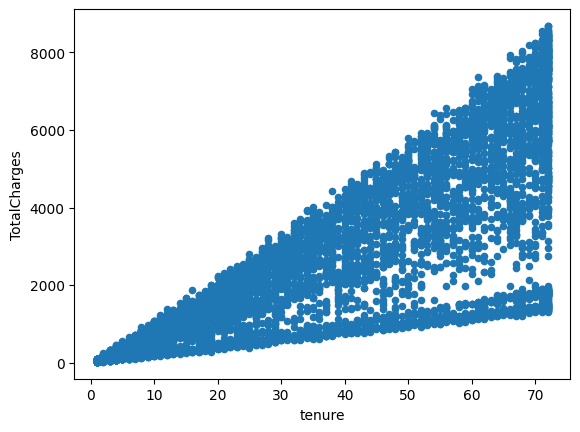

In [55]:
# Plotar em um gráfico Tenure e TotalCharges
df_churn.plot.scatter(x="tenure",y="TotalCharges")

Desafio 1: Validar a primeira hipótese de que a faixa etária do cliente tem uma forte associação com o Churn

Desafio 2: Validar com Teste de Hipótese se Contrato Mensal está mais propenso ao Churn

In [56]:
crosstable_churn_mais65anos=pd.crosstab(df_churn.Churn,df_churn.Mais65anos)

In [57]:
chi_scores_churn_mais65anos=chi2_contingency(crosstable_churn_mais65anos)

scores_churn_mais65anos=pd.Series(chi_scores_churn_mais65anos[0])
p_value_churn_mais65anos=pd.Series(chi_scores_churn_mais65anos[1])


# Apresentar numeros com decimais sem a notação científica
pd.set_option('display.float_format', lambda x: '%.15f' % x)

print("Qui^2: ",scores_churn_mais65anos)
print("p-value: ",p_value_churn_mais65anos)

Qui^2:  0   159.426300368387416
dtype: float64
p-value:  0   0.000000000000000
dtype: float64


In [58]:
df_churn['contract_group'] = df_churn['Contract'].apply(
    lambda x: 'Month-to-month' if x == 'Month-to-month' else 'Other'
)

# Criar tabela cruzada entre contrato simplificado e churn
crosstable_churn_contract = pd.crosstab(df_churn['contract_group'], df_churn['Churn'])

chi_scores_churn_contract=chi2_contingency(crosstable_churn_contract)

scores_churn_contract=pd.Series(chi_scores_churn_contract[0])
p_value_churn_contract=pd.Series(chi_scores_churn_contract[1])


# Apresentar numeros com decimais sem a notação científica
pd.set_option('display.float_format', lambda x: '%.15f' % x)

print("Qui^2: ",scores_churn_contract)
print("p-value: ",scores_churn_contract)

Qui^2:  0   1153.971661109347679
dtype: float64
p-value:  0   1153.971661109347679
dtype: float64


## Detecção de Outliers (Valores Atipicos)


In [60]:
df_churn.dropna(axis=0,inplace=True)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7032 non-null   object 
 1   Genero            7032 non-null   object 
 2   Mais65anos        7032 non-null   int64  
 3   TemParceiro       7032 non-null   object 
 4   TemDependentes    7032 non-null   object 
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  tenure            7032 non-null   int64  
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

<Axes: >

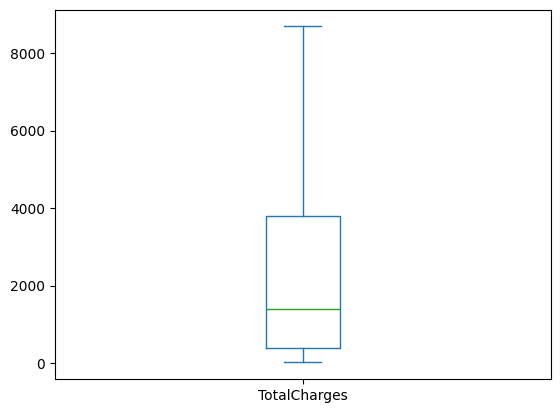

In [61]:
df_churn.TotalCharges.plot.box()

<Axes: title={'center': 'TotalCharges'}, xlabel='Contract'>

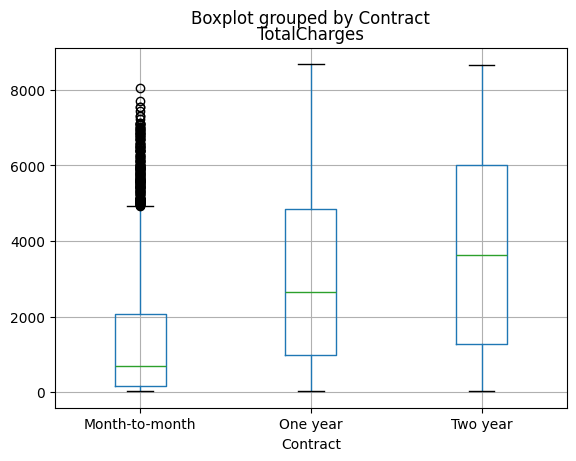

In [62]:
# Box plot agrupado por contract

df_churn.boxplot(column="TotalCharges",by="Contract")

In [64]:
# criar um dataframe somente com clientes do tipo month-to-month (contrato mensal)

df_churn_month = df_churn[df_churn.Contract == "Month-to-month"]
df_churn_month.head(5)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses,contract_group
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,Yes,Month-to-month
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,Yes,Month-to-month
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes,Yes,Month-to-month
5,9305-CDSKC,Female,0,No,No,Yes,Yes,Fiber optic,No,No,...,Yes,8,Month-to-month,Yes,Electronic check,99.650000000000006,820.500000000000000,Yes,No,Month-to-month
6,1452-KIOVK,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,22,Month-to-month,Yes,Credit card (automatic),89.099999999999994,1949.400000000000091,No,No,Month-to-month


<Axes: ylabel='Frequency'>

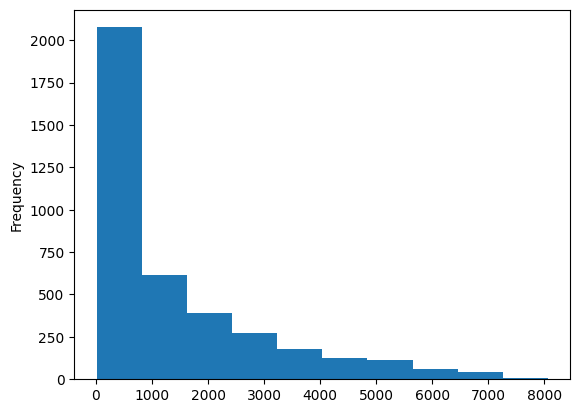

In [65]:
# Histograma para ceirificar visualmente se os dados seguem uma distribuição normal
df_churn_month.TotalCharges.plot.hist()

* Método de Turkey - IQR (Distribuição não normal)
* IQR - Range Interquertil
* IQR = 3º quartil - 1º quartil

In [66]:
q1_TotalCharges_month = df_churn_month.TotalCharges.quantile(0.25)
q3_TotalCharges_month = df_churn_month.TotalCharges.quantile(0.75)
iqr_TotalCharges_month = q3_TotalCharges_month - q1_TotalCharges_month
iqr_TotalCharges_month

np.float64(1906.4)

In [67]:
# Limites Inferior e Superior
limInf_TotalCharges_month = q1_TotalCharges_month - (1.5 * iqr_TotalCharges_month)
limSup_TotalCharges_month = q3_TotalCharges_month + (1.5 * iqr_TotalCharges_month)
limInf_TotalCharges_month, limSup_TotalCharges_month

(np.float64(-2699.5000000000005), np.float64(4926.1))

In [69]:
df_churn_month[(df_churn_month.TotalCharges < limInf_TotalCharges_month) | (df_churn_month.TotalCharges > limSup_TotalCharges_month)]

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses,contract_group
13,0280-XJGEX,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,49,Month-to-month,Yes,Bank transfer (automatic),103.700000000000003,5036.300000000000182,Yes,No,Month-to-month
61,1215-FIGMP,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,No,60,Month-to-month,Yes,Bank transfer (automatic),89.900000000000006,5450.699999999999818,No,No,Month-to-month
93,6067-NGCEU,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,65,Month-to-month,Yes,Credit card (automatic),111.049999999999997,7107.000000000000000,No,No,Month-to-month
110,0486-HECZI,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,...,No,55,Month-to-month,Yes,Electronic check,96.750000000000000,5238.899999999999636,Yes,No,Month-to-month
197,6168-YBYNP,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,59,Month-to-month,Yes,Electronic check,111.349999999999994,6519.750000000000000,No,No,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6897,2363-BJLSL,Male,0,No,No,Yes,No,DSL,No,Yes,...,Yes,62,Month-to-month,Yes,Bank transfer (automatic),80.400000000000006,4981.149999999999636,No,No,Month-to-month
6952,6394-MFYNG,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,48,Month-to-month,Yes,Bank transfer (automatic),107.400000000000006,5121.300000000000182,Yes,No,Month-to-month
6965,7789-CRUVC,Female,1,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,...,No,61,Month-to-month,Yes,Credit card (automatic),94.200000000000003,5895.449999999999818,No,No,Month-to-month
7023,1035-IPQPU,Female,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,63,Month-to-month,Yes,Electronic check,103.500000000000000,6479.399999999999636,No,No,Month-to-month


#### Z Score
Indica quantos desvios padrões um ponto específico de dados está distante da média
* zscore = (x-média)/desvio padrão

In [75]:
from scipy.stats import zscore

z= np.abs(zscore(df_churn_month.TotalCharges))

array([0.83003585, 0.78151294, 0.75455577, ..., 0.07798705, 0.63383722,
       0.65853247])

In [76]:
df_churn_month[z>3.0]

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses,contract_group
93,6067-NGCEU,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,65,Month-to-month,Yes,Credit card (automatic),111.049999999999997,7107.000000000000000,No,No,Month-to-month
197,6168-YBYNP,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,59,Month-to-month,Yes,Electronic check,111.349999999999994,6519.750000000000000,No,No,Month-to-month
339,1343-EHPYB,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,63,Month-to-month,Yes,Electronic check,103.400000000000006,6603.000000000000000,Yes,No,Month-to-month
402,0979-PHULV,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,...,Yes,69,Month-to-month,Yes,Credit card (automatic),99.450000000000003,7007.600000000000364,Yes,No,Month-to-month
445,7752-XUSCI,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,60,Month-to-month,Yes,Electronic check,105.900000000000006,6396.449999999999818,Yes,No,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,1548-FEHVL,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,61,Month-to-month,Yes,Electronic check,106.200000000000003,6375.199999999999818,No,No,Month-to-month
6587,7426-GSWPO,Male,1,No,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,64,Month-to-month,Yes,Bank transfer (automatic),103.500000000000000,6548.649999999999636,No,No,Month-to-month
6713,4989-LIXVT,Male,1,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,68,Month-to-month,Yes,Electronic check,95.900000000000006,6503.199999999999818,No,No,Month-to-month
7023,1035-IPQPU,Female,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,63,Month-to-month,Yes,Electronic check,103.500000000000000,6479.399999999999636,No,No,Month-to-month


## Automatização do processo de EDA

In [77]:
import sweetviz as sv
sv_churn_report = sv.analyze(df_churn, target_feat="Churn")
sv_churn_report.show_html(filepath="./report_churn.html", open_broeser=True, layout="widescreen")

ModuleNotFoundError: No module named 'sweetviz'